In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True 

In [2]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [3]:
mol = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C\
(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65")

In [4]:
#Draw.MolsToGridImage(mol,useSVG=True)
%pwd

'/home/pi/Documents/rdk'

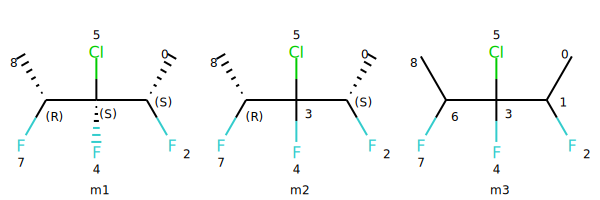

In [5]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
m1 = Chem.MolFromSmiles('C[C@H](F)[C@](F)(Cl)[C@H](F)C')
m2 = Chem.MolFromSmiles('C[C@H](F)C(F)(Cl)[C@H](F)C')
m3 = Chem.MolFromSmiles('CC(F)C(F)(Cl)C(F)C')
Draw.MolsToGridImage((m1,m2,m3),
    legends=('m1','m2','m3'),useSVG=True)

In [6]:
for m in (m1,m2,m3):
    print(Chem.FindMolChiralCenters(m,force=True,
                includeUnassigned=True))

[(1, 'S'), (3, 'S'), (6, 'R')]
[(1, 'S'), (3, '?'), (6, 'R')]
[(1, '?'), (6, '?')]


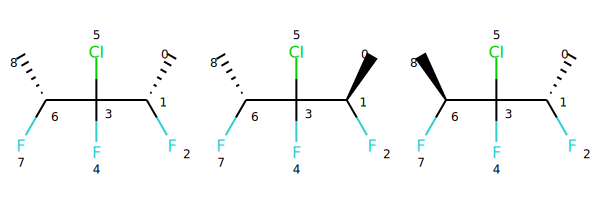

In [7]:
from rdkit.Chem import EnumerateStereoisomers
ms = EnumerateStereoisomers.EnumerateStereoisomers(m3)
Draw.MolsToGridImage(list(ms))

[(1, 'S'), (3, 'S'), (6, 'R')]
[(1, 'S'), (3, '?'), (6, 'R')]
[(1, '?'), (6, '?')]


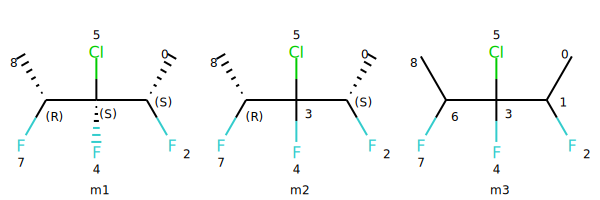

In [8]:
for m in (m1,m2,m3):
    print(Chem.FindMolChiralCenters(m,force=True,
                    includeUnassigned=True))
Draw.MolsToGridImage((m1,m2,m3),legends=('m1','m2','m3'))


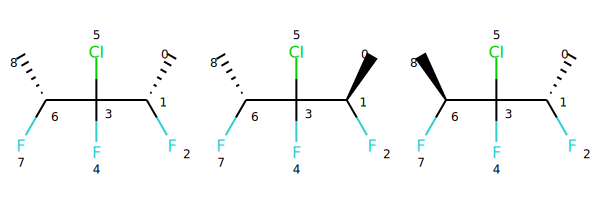

In [9]:
from rdkit.Chem import EnumerateStereoisomers
ms = EnumerateStereoisomers.EnumerateStereoisomers(m3)
Draw.MolsToGridImage(list(ms))

In [14]:
import copy
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('CC=CC(C=CC)C(C)C(C=CC)C=CC')

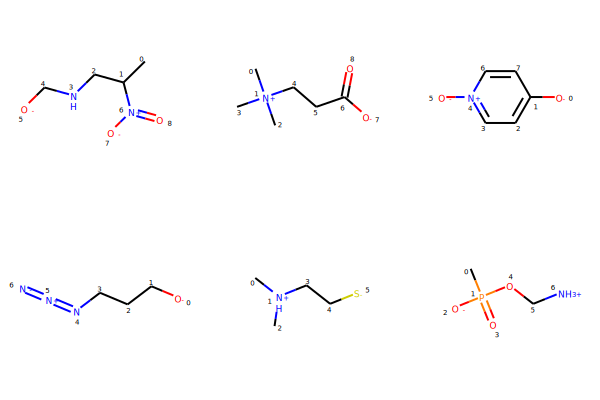

In [15]:
smiList = ['CC(CNC[O-])[N+]([O-])=O',
       'C[N+](C)(C)CCC([O-])=O',
       '[O-]C1=CC=[N+]([O-])C=C1',
       '[O-]CCCN=[N+]=[N-]',
       'C[NH+](C)CC[S-]',
       'CP([O-])(=O)OC[NH3+]']
mols = [Chem.MolFromSmiles(m) for m in smiList]
Draw.MolsToGridImage(mols,molsPerRow=3,
                     subImgSize=(200,200),useSVG=True)

In [24]:
m = Chem.MolFromSmiles('Cc1ccccc1')
#m = Chem.MolFromMolFile('input.mol')
#stringWithMolData=open('input.mol','r').read()
#m = Chem.MolFromMolBlock(stringWithMolData)

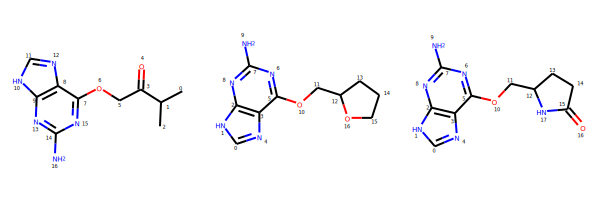

In [22]:
p = AllChem.ETKDGv2()
p.verbose = True
mols = [m for m in Chem.SDMolSupplier("cdk2.sdf") 
        if m != None][:3]
for mol in mols:
    mol.RemoveAllConformers()
hmols_1 = [Chem.AddHs(m) for m in mols]
hmols_2 = copy.deepcopy(hmols_1)
# Generate 100 conformers per each molecule
for mol in hmols_1:
    # AllChem.EmbedMolecule(mol, p, )
    AllChem.EmbedMultipleConfs(mol, 200, p)

for mol in hmols_2:
    # AllChem.EmbedMolecule(mol, p, )
    AllChem.EmbedMultipleConfs(mol, 200, p)
Draw.MolsToGridImage(mols)